In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('./Train.csv')
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [3]:
df_new = df.select_dtypes(exclude='object')
df_new['Segmentation'] = df.iloc[:,-1]
df_new = df_new.dropna()

/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
df_new['Segmentation'] = df_new['Segmentation'].replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4])
df_new

,ID,Age,Work_Experience,Family_Size,Segmentation
0,462809,22,1.0,4.0,4
2,466315,67,1.0,1.0,2
3,461735,67,0.0,2.0,2
5,461319,56,0.0,2.0,3
6,460156,32,1.0,3.0,3
...,...,...,...,...,...
8063,464018,22,0.0,7.0,4
8064,464685,35,3.0,4.0,4
8065,465406,33,1.0,1.0,4
8066,467299,27,1.0,4.0,2


In [5]:
df_f = df_new[['Age', 'Work_Experience', 'Family_Size']]
df_t = df_new[['Segmentation']]

In [6]:
df_f.describe()

,Age,Work_Experience,Family_Size
count,6969.000000,6969.000000,6969.000000
mean,43.469364,2.633089,2.844167
std,16.531090,3.402505,1.528469
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [7]:
def min_max_normalize(l):
    normalized = []
    
    for v in l:
        normalized_num = (v - min(l)) / (max(l) - min(l))
        normalized.append(normalized_num)
    
    return normalized

In [8]:
for i in df_f.columns:
    try:
        df_f[i] = min_max_normalize(df_f[i])
    except KeyError:
        var = 0
df_f.describe()

/Users/dayeonku/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Work_Experience,Family_Size
count,6969.000000,6969.000000,6969.000000
mean,0.358723,0.188078,0.230521
std,0.232832,0.243036,0.191059
min,0.000000,0.000000,0.000000
25%,0.183099,0.000000,0.125000
50%,0.323944,0.071429,0.250000
75%,0.492958,0.285714,0.375000
max,1.000000,1.000000,1.000000


In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

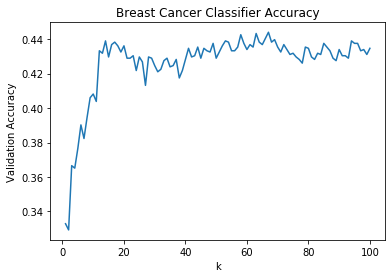

66


In [18]:
k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_X.values, train_Y.values.ravel())
  accuracies.append(knn.score(test_X.values, test_Y.values))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()
max_index_col = np.argmax(accuracies, axis=0)
print(max_index_col) # finding the best k value

In [19]:
train_X, test_X, train_Y, test_Y = np.array(train_test_split(df_f, df_t, test_size = 0.2, random_state = 100))

knn = KNeighborsClassifier(n_neighbors = 66)
knn.fit(train_X.values, train_Y.values.ravel())

print(knn.score(test_X.values, test_Y.values))

0.44045911047345765
